In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [104]:
data = pd.read_csv("./Output/MissingMigrants_final.csv")

In [105]:
display(data)

,Region of Incident,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Location Coordinates,Migration Route,temperatureMax,temperatureMin,uvIndex
0,Mediterranean,2019,Mar,Unknown,2.0,2,36.0,Unknown,2.0,Unknown,Drowning,Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,62.14,37.53,5
1,Mediterranean,2019,Mar,4.0,Unknown,4,11.0,3.0,Unknown,1.0,Drowning,Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,62.16,48.50,5
2,Mediterranean,2019,Mar,1.0,Unknown,1,Unknown,Unknown,Unknown,Unknown,Drowning,Spain,"35.871901875921, -5.343037665842",Western Mediterranean,66.90,57.19,4
3,Mediterranean,2019,Mar,1.0,Unknown,1,Unknown,Unknown,Unknown,Unknown,Drowning,Morocco,"35.635115912988, -5.275650103548",Western Mediterranean,71.45,54.19,5
4,Central America,2019,Mar,1.0,Unknown,1,Unknown,Unknown,1.0,Unknown,Accident,Mexico,"19.334475177429, -98.069823987538",Unknown,74.11,41.19,13
5,US-Mexico Border,2019,Mar,1.0,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,"Arizona, USA","32.057499000000, -111.666072500000",Unknown,74.57,37.74,9
6,US-Mexico Border,2019,Mar,1.0,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,"Arizona, USA","32.057499000000, -111.666072500000",Unknown,74.57,37.74,9
7,Southeast Asia,2019,Mar,8.0,2.0,10,Unknown,1.0,Unknown,Unknown,Accident,Myanmar,"13.865704814542, 99.587248723929",Unknown,99.22,72.77,10
8,US-Mexico Border,2019,Mar,1.0,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,"Arizona, USA","32.057499000000, -111.666072500000",Unknown,74.57,37.74,9
9,US-Mexico Border,2019,Mar,1.0,Unknown,1,Unknown,Unknown,Unknown,Unknown,Unknown,"Arizona, USA","32.057499000000, -111.666072500000",Unknown,74.48,37.75,9


In [108]:
def select_columns(data_frame,column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

In [137]:
data_filter = select_columns(data,['Reported Month','temperatureMin', 'Total Dead and Missing','Region of Incident'])

temperatureMin  Total Dead and Missing
Reported Month Region of Incident                                        
Dec            Caribbean                29.920000                6.000000
Jan            Europe                   30.720000                1.000000
               Horn of Africa           31.080000               70.000000
Nov            Horn of Africa           33.670000                5.000000
Mar            US-Mexico Border         39.207500                1.000000
               Europe                   42.230000                1.000000
Jan            US-Mexico Border         44.908750                1.166667
               Central America          45.277143                1.000000
Feb            US-Mexico Border         46.694091                1.045455
Dec            Mediterranean            47.317692                7.384615
Jan            South America            47.480000               12.500000
               Mediterranean            47.502500               10.400000
Nov            Central America          48.920000                1.000000
Feb            Mediterranean            49.319091                2.363636
Nov            Middle East              49.756667                2.333333
Mar            Mediterranean            50.076154                5.307692
Dec            Europe                   50.880000                1.500000
Nov            Sub-Saharan Africa       51.073000                1.300000
               Europe                   51.331429                1.428571
Feb            Middle East              51.390000                2.500000
               Central America          52.128000                1.000000
               North Africa             52.775000                2.250000
Nov            US-Mexico Border         53.191667                1.166667
Feb            Europe                   53.510000                1.000000
Mar            Central America          53.847143                4.428571
Jan            Middle East              54.560000                3.000000
Dec            US-Mexico Border         54.753333                1.033333
               Central America          55.790000                1.000000
Nov            Mediterranean            58.518235                8.764706
               South Asia               59.010000                2.000000
Mar            North Africa             60.570000               19.000000
Dec            Middle East              61.757500                1.500000
Nov            North Africa             65.600000               22.000000
Mar            Southeast Asia           72.770000               10.000000

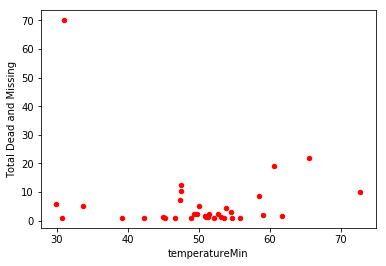

In [153]:
data_mean = data_filter.groupby(['Reported Month', 'Region of Incident']).mean().sort_values(by='temperatureMin')
display(data_mean)
#fig, ax = plt.subplots(figsize=(15,7))
#data_mean.plot(ax=ax)
#data_mean.plot(kind='')

data_mean.plot(kind='scatter',x='temperatureMin',y='Total Dead and Missing',color='red')


In [154]:
data_filter = select_columns(data,['Reported Month','temperatureMax', 'Total Dead and Missing','Region of Incident'])

temperatureMax  Total Dead and Missing
Reported Month Region of Incident                                        
Dec            Caribbean                47.000000                6.000000
Nov            Horn of Africa           49.610000                5.000000
Jan            Europe                   51.150000                1.000000
               Horn of Africa           51.350000               70.000000
Mar            Europe                   56.005000                1.000000
Jan            Middle East              57.110000                3.000000
               Central America          58.730000                1.000000
               US-Mexico Border         60.373750                1.166667
Feb            Europe                   60.390000                1.000000
Mar            North Africa             63.180000               19.000000
Nov            Central America          63.182000                1.000000
Jan            Mediterranean            63.383500               10.400000
Feb            Mediterranean            63.776364                2.363636
Dec            Central America          63.840000                1.000000
Mar            Mediterranean            64.399231                5.307692
Dec            Mediterranean            64.487692                7.384615
Feb            Central America          65.838000                1.000000
Jan            South America            65.915000               12.500000
Dec            Europe                   65.987500                1.500000
               Middle East              66.920000                1.500000
Nov            Sub-Saharan Africa       67.994000                1.300000
Feb            Middle East              68.745000                2.500000
               North Africa             69.267500                2.250000
               US-Mexico Border         69.449091                1.045455
Nov            US-Mexico Border         70.095833                1.166667
               Middle East              70.340000                2.333333
Dec            US-Mexico Border         71.434333                1.033333
Nov            Europe                   73.938571                1.428571
Mar            US-Mexico Border         74.381250                1.000000
Nov            Mediterranean            77.888824                8.764706
Mar            Central America          79.207143                4.428571
Nov            South Asia               86.000000                2.000000
               North Africa             91.340000               22.000000
Mar            Southeast Asia           99.220000               10.000000

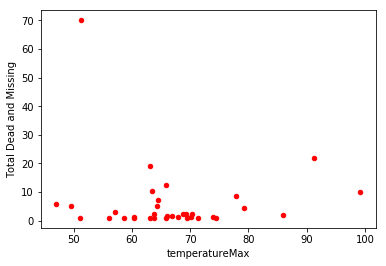

In [155]:
data_mean = data_filter.groupby(['Reported Month', 'Region of Incident']).mean().sort_values(by='temperatureMax')
display(data_mean)
#fig, ax = plt.subplots(figsize=(15,7))
#data_mean.plot(ax=ax)
#data_mean.plot(kind='')

data_mean.plot(kind='scatter',x='temperatureMax',y='Total Dead and Missing',color='red')

In [164]:
data_filter2= select_columns(data,['Region of Incident','temperatureMax', 'Cause of Death'])
display(data_filter2)

,Region of Incident,temperatureMax,Cause of Death
0,Mediterranean,62.14,Drowning
1,Mediterranean,62.16,Drowning
2,Mediterranean,66.90,Drowning
3,Mediterranean,71.45,Drowning
4,Central America,74.11,Accident
5,US-Mexico Border,74.57,Unknown
6,US-Mexico Border,74.57,Unknown
7,Southeast Asia,99.22,Accident
8,US-Mexico Border,74.57,Unknown
9,US-Mexico Border,74.48,Unknown


In [190]:
table_cross = pd.crosstab(data_filter2['Region of Incident'],data_filter2['Cause of Death'], margins=True, margins_name="Total")
table_cross.head()
dataPlot = table_cross[['Accident','Cardiac arrest','Dehydration','Murdered','Sickness and lack of access to medicines','Suffocation','Unknown','Weather conditions']]

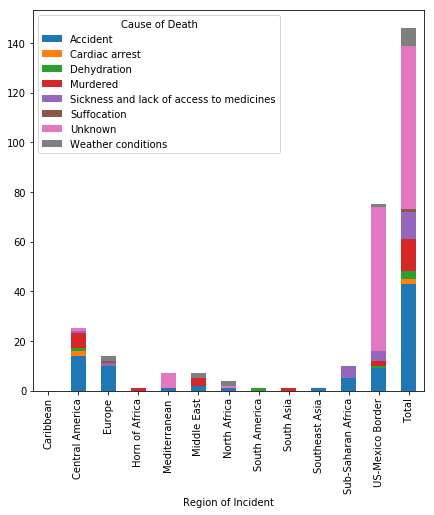

In [192]:
dataPlot.plot(kind="bar", figsize=(7,7), stacked=True)

In [51]:
def mean(data, colum):
    mean = data[colum].mean()
    return mean

In [65]:
mean(data_filter, 'temperatureMax') #Temperatura media 

67.33333333333333